In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

# Reading and Understanding Data

In [2]:
df=pd.read_csv('Leads.csv')
pd.set_option('display.max_columns',150)

In [3]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# no. of rows and columns present in data.
df.shape

(9240, 37)

In [5]:
#data type of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
#summary statistics of all the numeric columns in the dataset
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Mssing value check
df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
#check for duplicates
df['Prospect ID'].nunique()

9240

In [9]:
#check for duplicates
df['Lead Number'].nunique()

9240

In [10]:
# No duplicate values in Lead Number
#dropping Lead Number and Prospect ID since they have all unique values
df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

- Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped.


In [11]:
# Replacing Select option to nan value as they are treated as nan value in this data set
df =df.replace('Select',np.nan)

In [12]:
# Checking missing value
df.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [13]:
# Deletion of variables with more than and equal to 45%
cols = df.columns
for i in cols :
    if (df[i].isnull().mean()*100>=45):
        df.drop(i, axis=1, inplace = True)

In [14]:
#checking missing value
df.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

# Hanlding missing value

In [15]:
# Value Count check for Specialization col
df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [16]:
# Replacing of missing value with Not_specified & diffrent magament group to one Management_Specializations.
df['Specialization']=df['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management',
                                                 'IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management',
                                                 'Retail Management'],'Management_Specializations')
df['Specialization'] =df['Specialization'].replace(np.nan,'Not_specified')

In [17]:
# Value Count check for Tags col
df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [18]:
# Replacing missing value with Not Specified
df['Tags'] =df['Tags'].replace(np.nan,'Not Specified')
df['Tags']=df['Tags'].replace(['switched off','Busy','Lost to EINS','Not doing further education','Interested  in full time MBA'
                              ,'Graduation in progress','invalid number','Diploma holder (Not Eligible','wrong number given','opp hangup'
                              ,'number not provided','in touch with EINS','Lost to Others','Still Thinking','Want to take admission but has financial problems'
                              ,'In confusion whether part time or DLP','Interested in Next batch','Lateral student','Shall take in the next coming month',
                              'University not recognized','Recognition issue (DEC approval)','Diploma holder (Not Eligible)'],'Others')

In [19]:
# Value Count check for What is your current occupation col
df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [20]:
# Imputation of missing value with mode
df['What is your current occupation'] =df['What is your current occupation'].replace(np.nan,'Unemployed')
df['What is your current occupation']=df['What is your current occupation'].replace(['Housewife','Businessman','Other'],'Others')

In [21]:
# Value Count check for Country col
df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [22]:
# Value Count check for Last Activity col
df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [23]:
# Replacing missing value with Email Opened
df['Last Activity'] =df['Last Activity'].replace(np.nan,'Email Opened')
df['Last Activity']=df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked',
                            'Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

In [24]:
# Value Count check for Lead Source col
df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [25]:
# Replacing missing value with Google
df['Lead Source'] =df['Lead Source'].replace(np.nan,'Google')
df['Lead Source']=df['Lead Source'].replace('google','Google')
df['Lead Source']=df['Lead Source'].replace(['Facebook','youtubechannel'],'Social Media ')
df['Lead Source']=df['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat','testone','Pay per Click Ads',
                                             'welearnblog_Home','WeLearn','blog','NC_EDM'],'Others')

In [26]:
# Replacing missing value with Mumbai
df['City']=df['City'].replace(np.nan,'Mumbai')

# Univariate Analysis for categorical variable

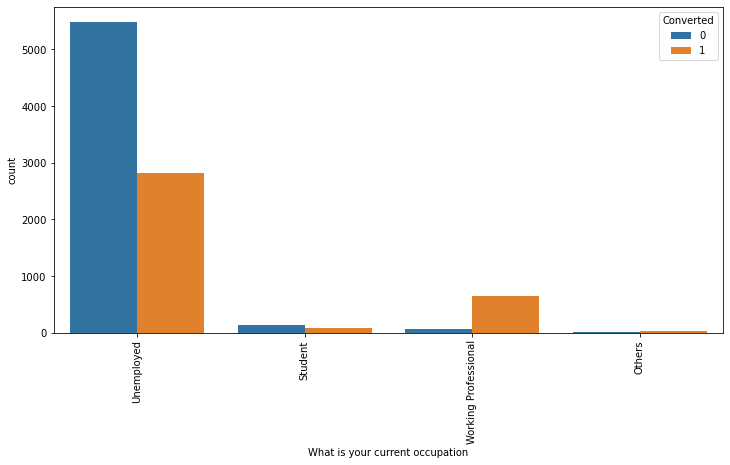

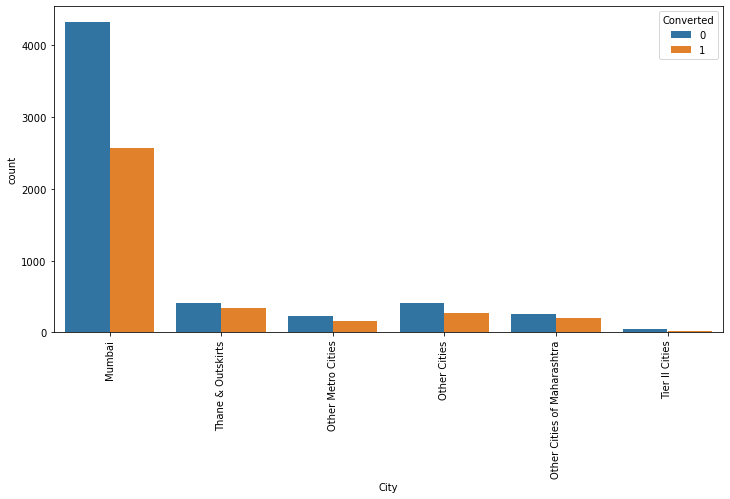

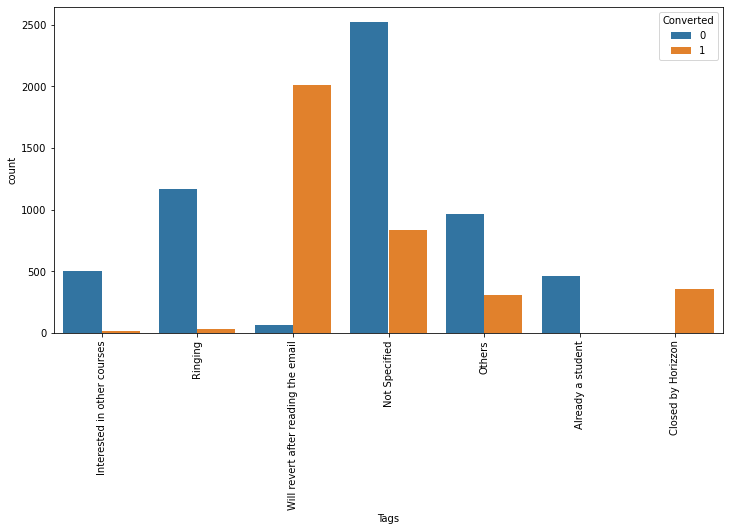

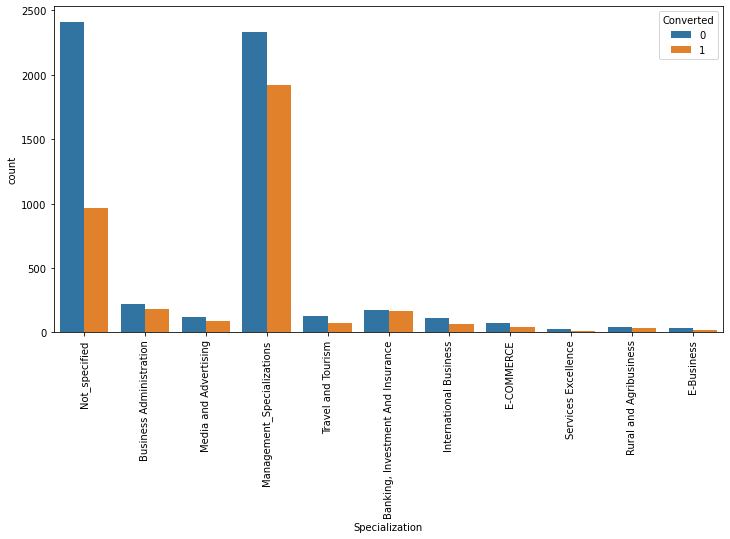

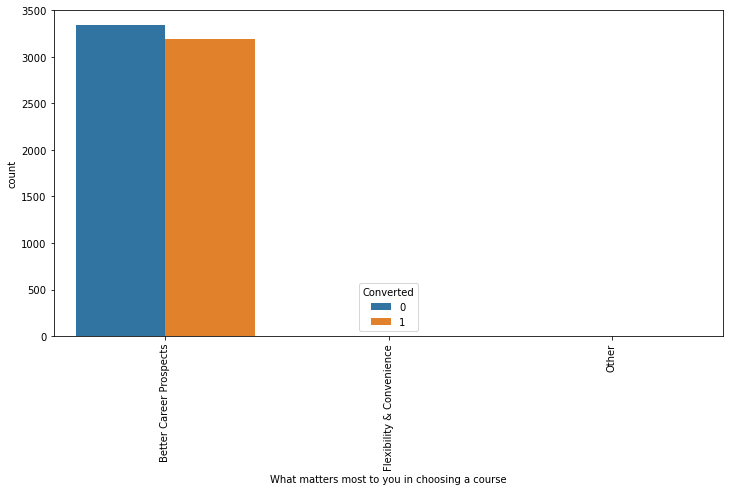

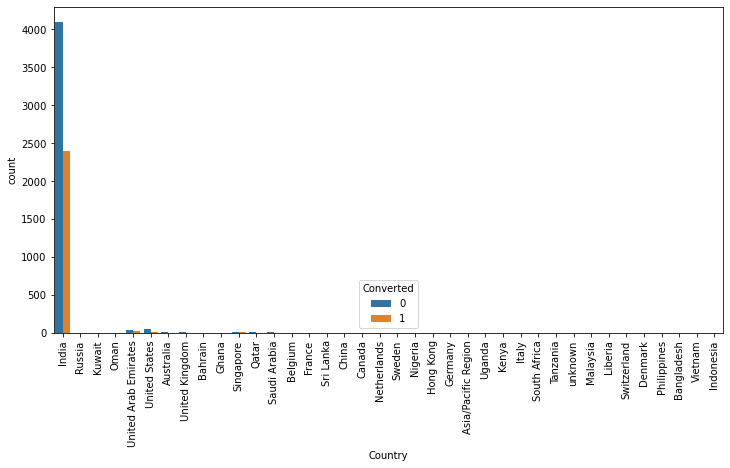

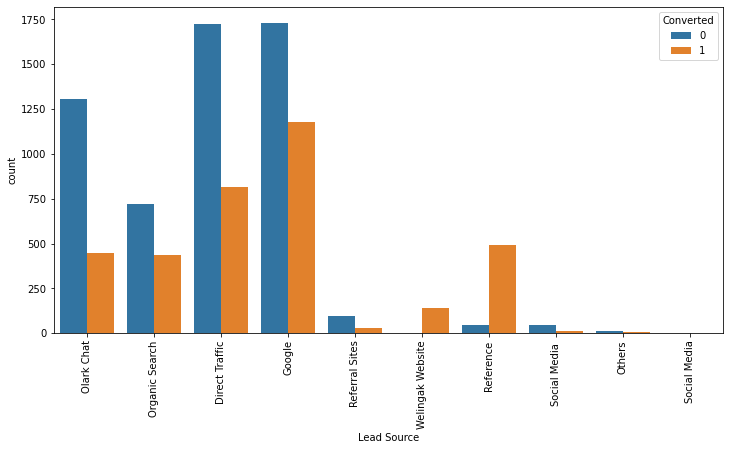

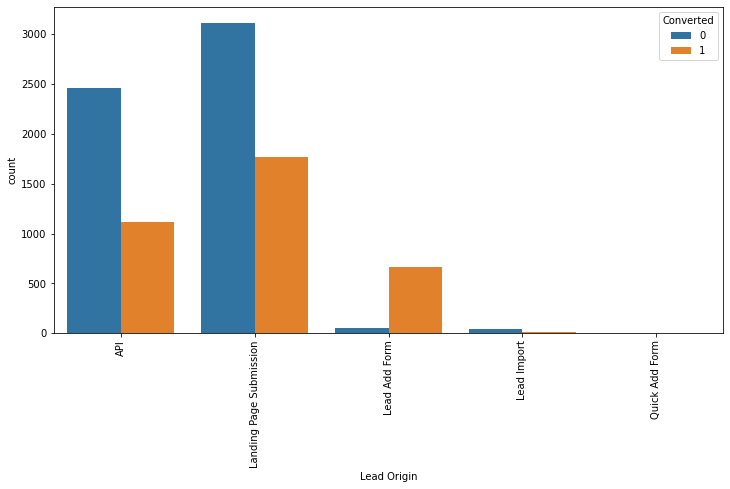

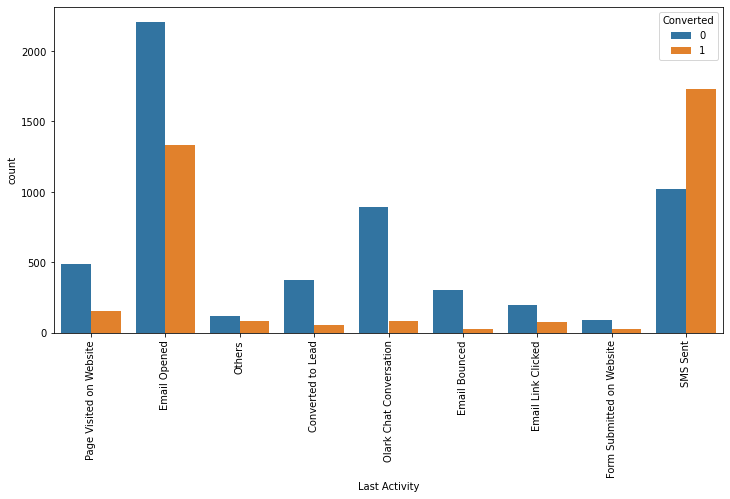

In [27]:
imp_cat_cols=['What is your current occupation','City','Tags','Specialization','What matters most to you in choosing a course'
              ,'Country','Lead Source','Lead Origin','Last Activity']
for i in imp_cat_cols:
    plt.figure(figsize=[12,6])
    sns.countplot(df[i],hue=df.Converted)
    plt.xticks(rotation=90)
    plt.show()

#### Occupation
- Working Professionals going for the course have high chances of joining it.
- Unemployed leads are the most in terms of Absolute numbers.

#### City 
- Mostly lead who are based on Mumbai having high conversion rate. 

#### Tags
- Student having zero number of conversion so we need not focus on that group.
- people who will revert back after reading mail and closed by horizzon having high conversion rate

#### Specialization
- Management specialization are the one who are having higher count in conversion 

#### Lead Source
- Conversion rate are high for reference and welingak website. 
- Maximum number of leads are generated by Google and Direct traffic.
- Focused should be more on improving lead converion of olark chat, organic search, direct traffic, and google leads as most number of customers are approching from these platform

#### Lead Origin
- Higher numbers of lead are being generated by API and Landing Page Submission 
- Need to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

#### Last Activity
- lead who are sent sms are having high conversion,olark chat is giving least number of conversion 
- Need to focus more on email aprroch 

In [28]:
# Dropping What matters most to you in choosing a course & Country due to high imbalace data with in variable 
df.drop(['What matters most to you in choosing a course','Country'],axis=1,inplace=True)

In [29]:
# Checking for missing value
df.isnull().mean()

Lead Origin                                 0.000000
Lead Source                                 0.000000
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 0.014827
Total Time Spent on Website                 0.000000
Page Views Per Visit                        0.014827
Last Activity                               0.000000
Specialization                              0.000000
What is your current occupation             0.000000
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

In [30]:
# Dropping rows with missing value
df = df.dropna()

In [31]:
# checking missing value
df.isnull().mean()

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

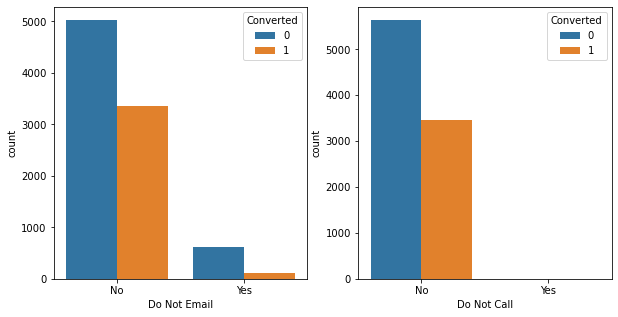

In [32]:
# Count plot for Do Not Email and Do Not Call
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.countplot(df['Do Not Email'],hue=df.Converted)
plt.subplot(1,2,2)
sns.countplot(df['Do Not Call'],hue=df.Converted)
plt.show()

- As we can visualise columns 'Do Not Email' & 'Do Not Call' are highly imbalance varibles better to drop these cols 

In [33]:
# checking imbalance data of Yes/No cols for 
lst=['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums',
     'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
    'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
    ,'A free copy of Mastering The Interview']

for i in lst:
    print(df[i].value_counts())
     
    

No     8379
Yes     724
Name: Do Not Email, dtype: int64
No     9101
Yes       2
Name: Do Not Call, dtype: int64
No     9089
Yes      14
Name: Search, dtype: int64
No    9103
Name: Magazine, dtype: int64
No     9101
Yes       2
Name: Newspaper Article, dtype: int64
No     9102
Yes       1
Name: X Education Forums, dtype: int64
No     9102
Yes       1
Name: Newspaper, dtype: int64
No     9099
Yes       4
Name: Digital Advertisement, dtype: int64
No     9096
Yes       7
Name: Through Recommendations, dtype: int64
No    9103
Name: Receive More Updates About Our Courses, dtype: int64
No    9103
Name: Update me on Supply Chain Content, dtype: int64
No    9103
Name: Get updates on DM Content, dtype: int64
No    9103
Name: I agree to pay the amount through cheque, dtype: int64
No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


- Value count of columns having high imbalance accept 'A free copy of Mastering The Interview' col

In [34]:
# Mapping of 'A free copy of Mastering The Interview' col 
df['A free copy of Mastering The Interview']=df['A free copy of Mastering The Interview'].map({'No':0,'Yes':1})
df['A free copy of Mastering The Interview']=df['A free copy of Mastering The Interview'].astype('object')

In [35]:
# Dropping unnecessary cols with high imbalace and duplicate variable  
df=df.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement'
           ,'Through Recommendations','Receive More Updates About Our Courses'
            ,'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'
           ,'Do Not Email','Last Notable Activity'],axis=1)

# Univariate Analysis Numerical Variable

In [36]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not_specified,Unemployed,Interested in other courses,Mumbai,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Not_specified,Unemployed,Ringing,Mumbai,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,1
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Mumbai,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not_specified,Unemployed,Will revert after reading the email,Mumbai,0


In [37]:
# Converting Total Time Spent on Website col from secs to minutes for better visulaization of data variance  
df['Total Time Spent on Website']= round(df['Total Time Spent on Website']/60,2)

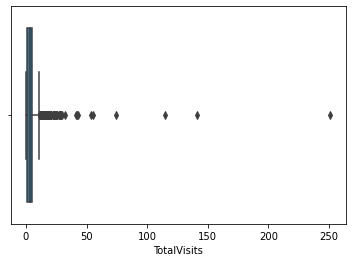

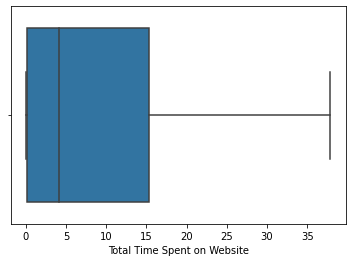

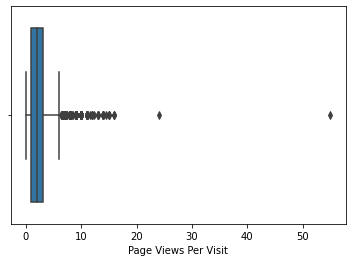

In [38]:
# ploting boxplot for Numeric cols 
num_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

- Total vists & Page Views Per Vist are having outliers need to be treated 

In [39]:
# outliers treatment using capping
q1=df['TotalVisits'].describe()['25%']
q3=df['TotalVisits'].describe()['75%']
IQR = q3-q1
lower_bound = q1-1.5*IQR
upper_bound = q3+1.5*IQR
print(lower_bound,upper_bound)

-5.0 11.0


In [40]:
df['TotalVisits']=np.where(df['TotalVisits']>upper_bound,upper_bound,df['TotalVisits'])

In [41]:
# outliers treatment using capping
q1=df['Page Views Per Visit'].describe()['25%']
q3=df['Page Views Per Visit'].describe()['75%']
IQR = q3-q1
lower_bound = q1-1.5*IQR
upper_bound = q3+1.5*IQR
print(lower_bound,upper_bound)

-2.0 6.0


In [42]:
df['Page Views Per Visit']=np.where(df['Page Views Per Visit']>upper_bound,upper_bound,df['Page Views Per Visit'])

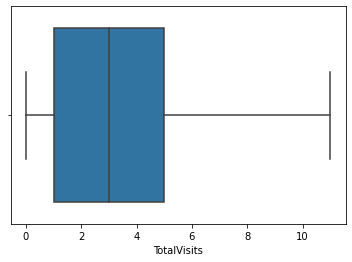

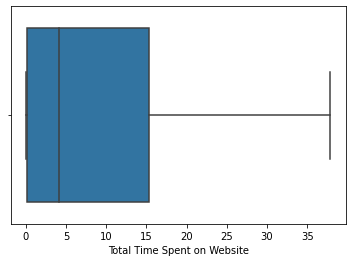

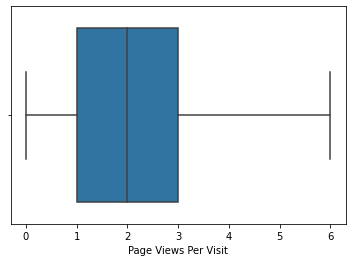

In [43]:
# Boxplot without outliers 
num_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

- Majority of leads are only visting bewtween 2 to 4 time
- Mostly leads are spending 4 to 5 min in website
- Most number of leads are viewing 2 pages 

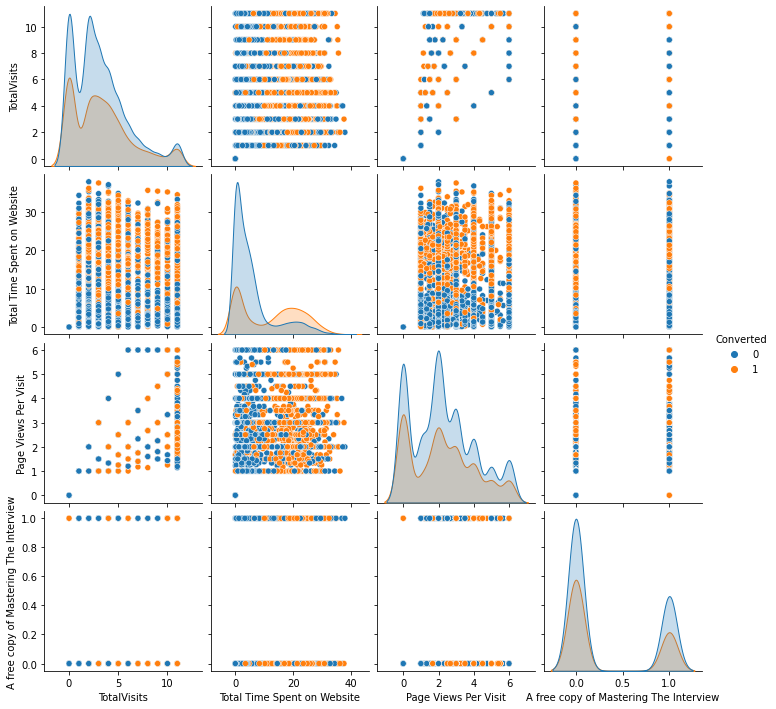

In [44]:
# Pairplot 
sns.pairplot(df,hue='Converted')

- correlation between Page Views Per Vist & TotalVisits variables can be visualize

<AxesSubplot:>

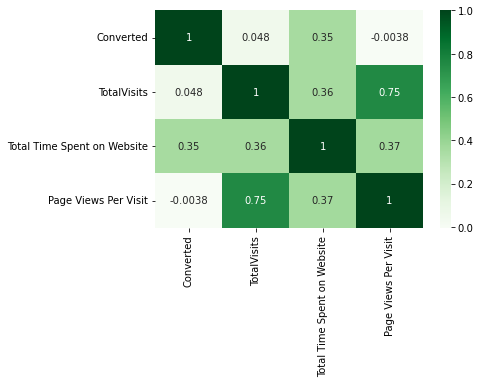

In [45]:
# Plotting heatmap on data to visaulaization of correlation between variable
sns.heatmap(df.corr(),cmap='Greens',annot =True)

In [46]:
# checking for imbalance 
df.Converted.value_counts(normalize=True)

0    0.619796
1    0.380204
Name: Converted, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

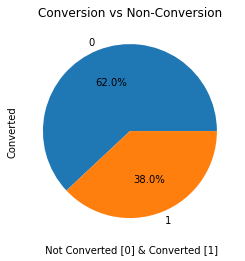

In [47]:
# Plotting bar plot for visualzing imbalance data
df.Converted.value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Conversion vs Non-Conversion')
plt.xlabel(" Not Converted [0] & Converted [1]")
plt.show

- Data is not highly imbalance as non converted ratio is 62% and converted ration is 38 %

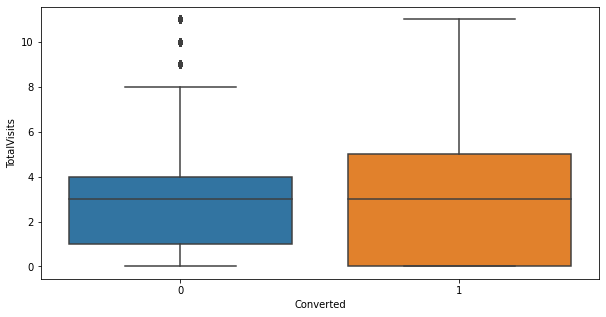

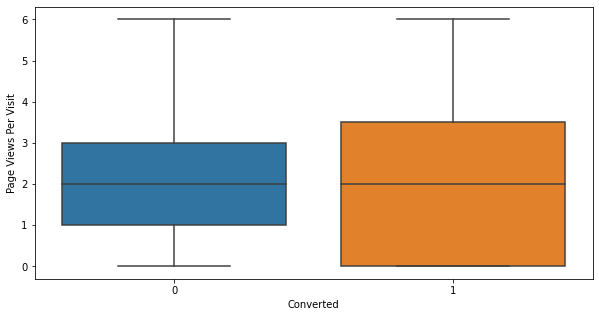

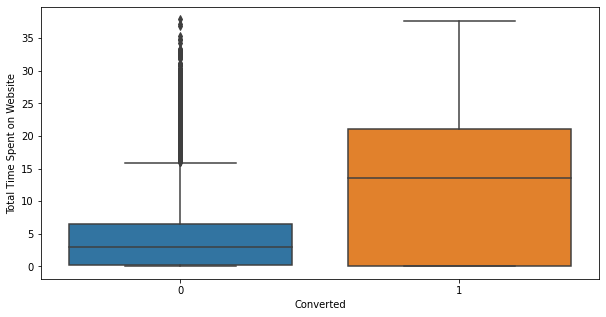

In [48]:
# Plotting boxplot for numeric variable 
num_list = ['TotalVisits','Page Views Per Visit','Total Time Spent on Website']

for i in num_list:
    plt.figure(figsize=[10,5])
    sns.boxplot(y = df[i], x = 'Converted', data = df)
    plt.show()

- lead who are spending time around 10 to 15 minutes on website are mostly conversing 

# Creation of Dummy Variable

In [49]:
dummy = pd.get_dummies(df[['What is your current occupation','Lead Origin','City']],drop_first=True)
dummy.head()

,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,1,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,0


In [50]:
dummy1=pd.get_dummies(df['Last Activity'],prefix='Last Activity')
dummy1 = dummy1.drop(['Last Activity_Others'], axis=1)
dummy1.head()

,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent
0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [51]:
dummy2=pd.get_dummies(df['Lead Source'],prefix='Lead Source')
dummy2 = dummy2.drop(['Lead Source_Others'], axis=1)
dummy2.head()

,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [52]:
dummy3=pd.get_dummies(df['Specialization'],prefix='Specialization')
dummy3 = dummy3.drop(['Specialization_Not_specified'], axis=1)
dummy3.head()

,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [53]:
dummy4=pd.get_dummies(df['Tags'],prefix='Tags')
dummy4 = dummy4.drop(['Tags_Others'], axis=1)
dummy4.head()

,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,0,1,0
4,0,0,0,0,0,1


### Data Concatenation

In [54]:
# Concatinating dummy data
df1=pd.concat([df,dummy,dummy1,dummy2,dummy3,dummy4],axis=1)

In [55]:
# Dropping previous cols after creating dummy 
drop_cols=['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags'
          ,'City',]
df1.drop(drop_cols,axis=1,inplace=True)

In [56]:
df1.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Social Media,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email
0,0,0.0,0.00,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5.0,11.23,2.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,2.0,25.53,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,1.0,5.08,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1,2.0,23.80,1.0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#  Splitting data into Train-Test sets

In [57]:
# Creation of  X and y 
X=df1.drop('Converted',axis=1)
y=df1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [58]:
# splittind data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y ,train_size=0.7 ,random_state=100)

In [59]:
X_train.shape

(6372, 48)

In [60]:
X_test.shape

(2731, 48)

# Rescaling the variables

In [61]:
# Using standardscaler() for scaling variables
scaler = StandardScaler()
num_cols=X_train.select_dtypes(include=['float64','int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Social Media,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email
7962,-0.079783,1.475961,-0.423364,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5520,1.299804,-0.771062,2.083179,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1962,0.610010,-0.570886,0.133646,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1566,2.679391,1.393471,0.690655,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9170,-1.114473,-0.881048,-1.258878,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


# Model Building using Stats Model & RFE 

In [62]:
# Ftiing RFE
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=18)             # running RFE with 18 variables as output
rfe = rfe.fit(X_train, y_train)  

In [63]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 5),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('A free copy of Mastering The Interview', False, 19),
 ('What is your current occupation_Student', False, 27),
 ('What is your current occupation_Unemployed', False, 18),
 ('What is your current occupation_Working Professional', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('City_Other Cities', False, 12),
 ('City_Other Cities of Maharashtra', False, 13),
 ('City_Other Metro Cities', False, 22),
 ('City_Thane & Outskirts', False, 15),
 ('City_Tier II Cities', False, 7),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 29),
 ('Last Activity_Email Opened', True, 1),
 ('Last Activity_Form Submitted on Website', False, 28),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Vi

In [64]:
# list of selected cols
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website',
       'What is your current occupation_Working Professional',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Specialization_Travel and Tourism', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Ringing', 'Tags_Will revert after reading the email'],
      dtype='object')

In [65]:
# list of  eliminated cols 
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed', 'Lead Origin_Lead Import',
       'City_Other Cities', 'City_Other Cities of Maharashtra',
       'City_Other Metro Cities', 'City_Thane & Outskirts',
       'City_Tier II Cities', 'Last Activity_Email Link Clicked',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Social Media ',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media an

In [66]:
# Bulidng 1st Model 
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1544.8
Date:                Mon, 20 Mar 2023   Deviance:                       3089.6
Time:                        18:50:35   Pearson chi2:                 7.43e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5695
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9812      0.166    -11.952      0.000      -2.306      -1.656
Total Time Spent on Website                              1.1050      0.054     20.652      0.000       1.000       1.210
What is your current occupation_Working Professional     1.0010      0.326      3.071      0.002       0.362       1.640
Lead Origin_Landing Page Submission                     -0.5117      0.119     -4.306      0.000      -0.745      -0.279
Lead Origin_Lead Add Form                                2.4965      0.822      3.037      0.002       0.886       4.108
Last Activity_Converted to Lead                         -0.6414      0.304     -2.108      0.035      -1.238      -0.045
Last Activity_Email Bounced                             -1.1958      0.399     -2.999      0.003      -1.977      -0.414
Last Activity_Email Opened                               0.6119      0.155      3.953      0.000       0.309       0.915
Last Activity_Olark Chat Conversation                   -1.1539      0.242     -4.776      0.000      -1.627      -0.680
Last Activity_SMS Sent                                   1.8874      0.158     11.929      0.000       1.577       2.197
Lead Source_Olark Chat                                   1.1018      0.154      7.174      0.000       0.801       1.403
Lead Source_Reference                                   -0.7497      0.912     -0.822      0.411      -2.538       1.038
Lead Source_Welingak Website                             2.9240      1.093      2.674      0.007       0.781       5.067
Specialization_Travel and Tourism                       -0.6908      0.362     -1.910      0.056      -1.400       0.018
Tags_Already a student                                  -3.0952      0.602     -5.142      0.000      -4.275      -1.915
Tags_Closed by Horizzon                                  5.8270      0.726      8.028      0.000       4.404       7.250
Tags_Interested in other courses                        -2.3960      0.367     -6.527      0.000      -3.115      -1.676
Tags_Ringing                                            -2.9789      0.237    -12.588      0.000      -3.443      -2.515
Tags_Will revert after reading the email                 4.3890      0.184     23.887      0.000       4.029       4.749
========================================================================================================================
"""

- Lead Source_Reference column is having very high p-value
- Specialization_Travel and Tourism column is also having p-value more than 0.05
- Better to drop Lead Source_Reference column as this is not significant variable for model

In [67]:
# Dropping Lead Source_Reference col with high p-vale
col = col.drop('Lead Source_Reference',1)

In [68]:
#Building 2nd model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1545.1
Date:                Mon, 20 Mar 2023   Deviance:                       3090.3
Time:                        18:50:35   Pearson chi2:                 7.51e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5695
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9818      0.166    -11.957      0.000      -2.307      -1.657
Total Time Spent on Website                              1.1057      0.053     20.670      0.000       1.001       1.211
What is your current occupation_Working Professional     0.9823      0.325      3.018      0.003       0.344       1.620
Lead Origin_Landing Page Submission                     -0.5101      0.119     -4.294      0.000      -0.743      -0.277
Lead Origin_Lead Add Form                                1.9194      0.377      5.094      0.000       1.181       2.658
Last Activity_Converted to Lead                         -0.6404      0.304     -2.106      0.035      -1.236      -0.044
Last Activity_Email Bounced                             -1.1949      0.398     -2.999      0.003      -1.976      -0.414
Last Activity_Email Opened                               0.6117      0.155      3.953      0.000       0.308       0.915
Last Activity_Olark Chat Conversation                   -1.1539      0.241     -4.778      0.000      -1.627      -0.681
Last Activity_SMS Sent                                   1.8885      0.158     11.937      0.000       1.578       2.199
Lead Source_Olark Chat                                   1.1045      0.153      7.196      0.000       0.804       1.405
Lead Source_Welingak Website                             3.5020      0.813      4.308      0.000       1.909       5.095
Specialization_Travel and Tourism                       -0.6909      0.361     -1.911      0.056      -1.399       0.018
Tags_Already a student                                  -3.0963      0.602     -5.143      0.000      -4.276      -1.916
Tags_Closed by Horizzon                                  5.7968      0.725      8.000      0.000       4.377       7.217
Tags_Interested in other courses                        -2.4002      0.367     -6.538      0.000      -3.120      -1.681
Tags_Ringing                                            -2.9910      0.236    -12.649      0.000      -3.454      -2.528
Tags_Will revert after reading the email                 4.3840      0.184     23.866      0.000       4.024       4.744
========================================================================================================================
"""

- Again Specialization_Travel and Tourism column is having p-value of 0.056 so dropping the column as it is not significant

In [69]:
# Dropping Specialization_Travel and Tourism col with high p-value
col = col.drop('Specialization_Travel and Tourism',1)

In [70]:
#Building 3rd model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1547.1
Date:                Mon, 20 Mar 2023   Deviance:                       3094.2
Time:                        18:50:35   Pearson chi2:                 7.52e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5692
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9853      0.166    -11.983      0.000      -2.310      -1.661
Total Time Spent on Website                              1.1071      0.053     20.711      0.000       1.002       1.212
What is your current occupation_Working Professional     1.0016      0.325      3.079      0.002       0.364       1.639
Lead Origin_Landing Page Submission                     -0.5312      0.118     -4.487      0.000      -0.763      -0.299
Lead Origin_Lead Add Form                                1.9220      0.376      5.108      0.000       1.185       2.659
Last Activity_Converted to Lead                         -0.6348      0.304     -2.089      0.037      -1.230      -0.039
Last Activity_Email Bounced                             -1.2306      0.399     -3.081      0.002      -2.013      -0.448
Last Activity_Email Opened                               0.6176      0.155      3.993      0.000       0.314       0.921
Last Activity_Olark Chat Conversation                   -1.1473      0.241     -4.756      0.000      -1.620      -0.674
Last Activity_SMS Sent                                   1.8863      0.158     11.936      0.000       1.577       2.196
Lead Source_Olark Chat                                   1.1060      0.153      7.207      0.000       0.805       1.407
Lead Source_Welingak Website                             3.5055      0.813      4.312      0.000       1.912       5.099
Tags_Already a student                                  -3.1010      0.602     -5.151      0.000      -4.281      -1.921
Tags_Closed by Horizzon                                  5.8063      0.725      8.011      0.000       4.386       7.227
Tags_Interested in other courses                        -2.4146      0.367     -6.571      0.000      -3.135      -1.694
Tags_Ringing                                            -2.9792      0.236    -12.612      0.000      -3.442      -2.516
Tags_Will revert after reading the email                 4.3657      0.183     23.867      0.000       4.007       4.724
========================================================================================================================
"""

- Now p-value is less than 0.05 which is good 


### VIF

In [71]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,2.63
8,Last Activity_SMS Sent,2.16
6,Last Activity_Email Opened,2.11
3,Lead Origin_Lead Add Form,2.02
9,Lead Source_Olark Chat,2.01
15,Tags_Will revert after reading the email,1.97
7,Last Activity_Olark Chat Conversation,1.55
0,Total Time Spent on Website,1.41
10,Lead Source_Welingak Website,1.37
1,What is your current occupation_Working Profes...,1.32


- Even VIF is less than 5 which is also a indicator of non multilinearity

In [72]:
# Using predict() for predicting y_train 
y_train_pred = res.predict(X_train_sm)
y_train_pred.head(10)

7962    0.731815
5520    0.059939
1962    0.220578
1566    0.993380
9170    0.012893
5097    0.224941
8954    0.021893
309     0.883364
5519    0.507896
1050    0.975907
dtype: float64

In [73]:
# Using Reshape() to reshape the y_train_pred
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73181504, 0.05993925, 0.22057822, 0.99338045, 0.01289327,
       0.22494057, 0.02189255, 0.8833635 , 0.50789611, 0.97590723])

In [74]:
# creating new dataframe with probability 
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.731815,7962
1,0,0.059939,5520
2,0,0.220578,1962
3,1,0.993380,1566
4,0,0.012893,9170


In [75]:
# Using general cutoff of 0.5 for prediction 
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.731815,7962,1
1,0,0.059939,5520,0
2,0,0.220578,1962,0
3,1,0.993380,1566,1
4,0,0.012893,9170,0


In [76]:
# Creating Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3738,  215],
       [ 404, 2015]], dtype=int64)

In [77]:
# cheking for accuracy of model
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.9028562460765851

In [78]:
# indexing TP/TN/FP/FN 
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [79]:
# calculating sensitivity of model
TP / float(TP+FN)

0.8329888383629599

In [80]:
# calculating specificity of model
TN / float(TN+FP)

0.9456109284088035

In [81]:
# calculating False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.05438907159119656


In [82]:
# calculating positive predictive value 
print (TP / float(TP+FP))

0.9035874439461884


In [83]:
# calculating negative predictive value
print (TN / float(TN+ FN))

0.90246257846451


# ROC CURVE


In [84]:
# Plotting ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

In [85]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, 
                                         drop_intermediate = False )

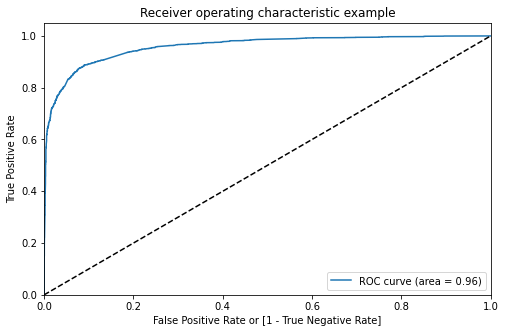

In [86]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

- Area under cover is 96% which is indicating a good predictive model as ROC curve is towards TPR side and should have value close to 1.

# Finding Optimal Cutoff Point


In [87]:
# Running for loop in set of cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.731815,7962,1,1,1,1,1,1,1,1,1,0,0
1,0,0.059939,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.220578,1962,0,1,1,1,0,0,0,0,0,0,0
3,1,0.993380,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.012893,9170,0,1,0,0,0,0,0,0,0,0,0


In [88]:
# finding optimal cutoff
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[i,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.788293  0.967755  0.678472
0.2   0.2  0.851695  0.942125  0.796357
0.3   0.3  0.898305  0.889210  0.903870
0.4   0.4  0.904269  0.861100  0.930686
0.5   0.5  0.902856  0.832989  0.945611
0.6   0.6  0.896422  0.784208  0.965090
0.7   0.7  0.889360  0.748656  0.975462
0.8   0.8  0.879159  0.706490  0.984822
0.9   0.9  0.861896  0.651095  0.990893


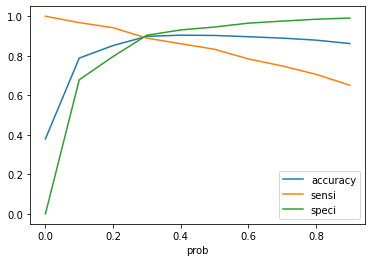

In [89]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- Trade of between Accuracy, Sesnsitivity, Specificity showing the optimal cut off probability of 0.3 .

In [90]:
# Final predication after optimal cutoff
y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.731815,7962,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.059939,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.220578,1962,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.993380,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.012893,9170,0,1,0,0,0,0,0,0,0,0,0,0


In [91]:
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted
0,0,0.731815,7962,1
1,0,0.059939,5520,0
2,0,0.220578,1962,0
3,1,0.993380,1566,1
4,0,0.012893,9170,0


#### Lead Score 

In [92]:
# Generating lead score based on probability
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))
y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.731815,7962,1,73
1,0,0.059939,5520,0,6
2,0,0.220578,1962,0,22
3,1,0.993380,1566,1,99
4,0,0.012893,9170,0,1


In [93]:
lead_check= y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_Predicted']]
lead_check['final_Predicted'].value_counts()

1    2151
0     268
Name: final_Predicted, dtype: int64

In [94]:
# finding out the final conversion on train set
2151/float(2151+268)

0.8892104175279041

- Conversion rate is being increased from 30% to 88% based on train set prediction 

In [95]:
# confusion mertics with optimal cutoff
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3573,  380],
       [ 268, 2151]], dtype=int64)

In [96]:
# Final accuracy of model
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8983050847457628

In [97]:
# creation of TP/TN/FP/FN
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [98]:
# Final sensitivity of model
TP / float(TP+FN)

0.8892104175279041

In [99]:
# Final specificity of model
TN / float(TN+FP)

0.9038704781178851

In [100]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.09612952188211485


In [101]:
# Positive predictive value 
print (TP / float(TP+FP))

0.849861714737258


In [102]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9302265035147097


In [103]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3573,  380],
       [ 268, 2151]], dtype=int64)

In [104]:
# Precision of model 
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.849861714737258

In [105]:
# Recall of model 
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8892104175279041

In [106]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

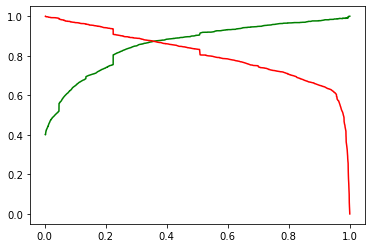

In [107]:
# plotting trade off between Precision & Recall
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

- Above curve of precision and recall is also give optimal cut off probability of 0.3 .

# Test data set

In [108]:
#scaling test set 
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Social Media,Lead Source_Welingak Website,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email
3504,-0.068989,-0.108152,0.416452,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4050,-1.125494,-0.888073,-1.263530,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7201,-0.421158,0.421356,-0.143542,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1196,0.283179,-0.110358,0.976446,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8219,1.339684,-0.433579,-0.283540,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [109]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,What is your current occupation_Working Professional,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Lead Source_Olark Chat,Lead Source_Welingak Website,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Ringing,Tags_Will revert after reading the email
3504,-0.108152,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4050,-0.888073,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
7201,0.421356,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1196,-0.110358,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
8219,-0.433579,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [110]:
# Adding constant
X_test_sm = sm.add_constant(X_test)

In [111]:
# Predicting y_test 
y_test_pred = res.predict(X_test_sm)

In [112]:
y_test_pred[:10]

3504    0.006707
4050    0.994544
7201    0.459155
1196    0.006691
8219    0.047580
8747    0.223587
9048    0.764721
6524    0.041120
7693    0.211778
8187    0.105324
dtype: float64

In [113]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3504,0.006707
4050,0.994544
7201,0.459155
1196,0.006691
8219,0.047580


In [114]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [115]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
3504,0,3504
4050,1,4050
7201,0,7201
1196,0,1196
8219,1,8219


In [116]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [117]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.006707
1,1,4050,0.994544
2,0,7201,0.459155
3,0,1196,0.006691
4,1,8219,0.047580


In [118]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.006707
1,1,4050,0.994544
2,0,7201,0.459155
3,0,1196,0.006691
4,1,8219,0.047580


#### Lead Score

In [119]:
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.006707,1
1,4050,1,0.994544,99
2,7201,0,0.459155,46
3,1196,0,0.006691,1
4,8219,1,0.047580,5


In [120]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,3504,0,0.006707,1,0
1,4050,1,0.994544,99,1
2,7201,0,0.459155,46,1
3,1196,0,0.006691,1,0
4,8219,1,0.047580,5,0


In [121]:
lead_check_test = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_Predicted']]
lead_check_test['final_Predicted'].value_counts()

1    938
0    104
Name: final_Predicted, dtype: int64

In [122]:
# finding out the final conversion on test set
938/float(938+104)

0.9001919385796545

- Conversion rate is being increased from 30% to 90% based on test set prediction 

In [123]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1521,  168],
       [ 104,  938]], dtype=int64)

In [124]:
# Accuray of test data
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.90040278286342

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
# sensitivity of test data
TP / float(TP+FN)

0.9001919385796545

In [127]:
# specificity of test data
TN / float(TN+FP)

0.9005328596802842

In [128]:
# Precision of test data
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.8481012658227848

In [129]:
# Recall of test data
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.9001919385796545

### Train Set 
- Accuracy : 89.83%
- Sensitivity : 88.92%
- Specificity : 90.38%
- Precision : 84.98%
- Recall : 88.92%

### Test Set  
- Accuracy : 90.04%
- Sensitivity : 90.01%
- Specificity : 90.05%
- Precision :84.81%
- Recall : 90.01%

#### Lead Origin_Landing Page Submission, Last Activity_Converted to Lead, Last Activity_Email Bounced, Last Activity_Olark Chat Conversation, Tags_Already a student, Tags_Interested in other courses, Tags_Ringing are the variables which are negatively correlated with target variable converted.
#### As our focus was on  predicting conversion rate correclty and the Model seems to predict the Conversion Rate very well as sensitivity is 90.38% on train set and 90.01% on test set So we should be able to give the CEO confidence in making good calls based on this model
#### Also the the model is giving the 88% conversion rate from train set and 90% from test set.